In [1]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")

In [3]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


### 1.  Descriptive analytics on the dataset.

In [11]:
#Numerical/Statistical analysis of the dataset
df.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [6]:
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  28 rows and  3 columns in the dataset.


In [7]:
#check for null values
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [10]:
#schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


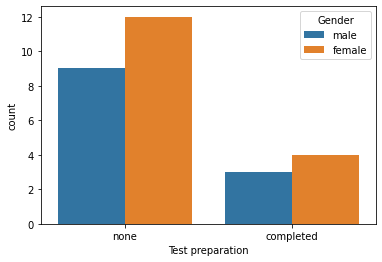

In [8]:
plt.figure()
ax=sns.countplot(x='Test preparation',data=df,hue='Gender')
plt.show()

### 2.  Check whether female and male students scored the same marks.

###### H0 : Mean Score of female students > Mean Score of male students

###### H1 : Mean Score of female students <= Mean Score of male students

In [15]:
grouped=df.groupby("Gender")
male=grouped.get_group('male')
female=grouped.get_group('female')

In [16]:
ttest,pval = ttest_ind(female["Total Marks"],male["Total Marks"],alternative="greater")
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Mean Score of female students <= Mean Score of male students")
else:
  print("We accept null hypothesis i.e. Mean Score of female students > Mean Score of male students")

p-value 0.24689111589803814
We accept null hypothesis i.e. Mean Score of female students > Mean Score of male students


### 3.  check whether test preparation helps the students

##### H0 : Mean of students who completed the test preparation > Mean of students who did not complete the test preparation

##### H1 : Mean  of students who completed the test preparation <= Mean  of students who did not complete the test preparation

In [20]:
grouped=df.groupby("Test preparation")
not_completed=grouped.get_group('none')
completed=grouped.get_group('completed')

In [22]:
ttest,pval = ttest_ind(completed['Total Marks'],not_completed['Total Marks'],alternative='greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation")
else:
  print("We accept null hypothesis i.e. Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test prep")

p-value 0.0006335646228660053
We reject null hypothesis i.e. Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation
